In [16]:
import pandas as pd
import scipy.stats as stats
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

def split(data,prefix=""):
  data_train, data_test = train_test_split(data, test_size=0.33, random_state=1337)
  data_train.to_csv(f"{prefix}_train.csv", index=False)
  data_test.to_csv(f"{prefix}_test.csv", index=False)

data = pd.read_csv("data.csv")
split(data,"raw")

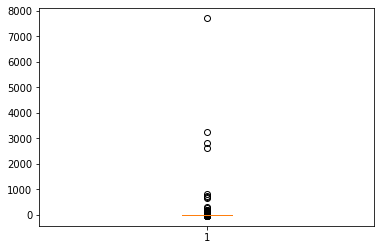

In [17]:
#@title 
#@markdown Boxplot van SalesQuantity waarden voor het verwijderen van
#@markdown uitschieters.
fig, ax = plt.subplots()
ax.boxplot(data.loc[:,"SalesQuantity"])
plt.show()

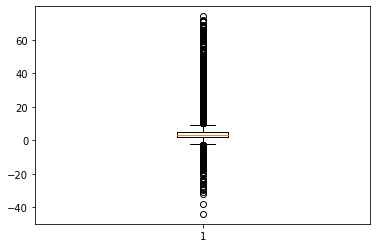

In [23]:
#@title 
#@markdown Boxplot van SalesQuantity waarden na het
#@markdown verwijderen van uitschieters. Waarden
#@markdown liggen dichter op elkaar. Uitschieters hebben
#@markdown nu minder invloed op het model.
data_sq = data["SalesQuantity"].reset_index()
data_sq_filtered = data_sq[(np.abs(stats.zscore(data_sq)) < 3).all(axis=1)]
fig, ax = plt.subplots()
ax.boxplot(data_sq_filtered.loc[:,"SalesQuantity"])
plt.show()

In [19]:
data_filtered = data.loc[data.index.isin(data_sq_filtered.index.values),:]
data_filtered.to_csv("data_filtered.csv",index=False)

In [20]:
split(data_filtered, "clean")